# <center><font color = "green">PUBG Game Prediction</font></center>

<center><img src = "https://media.giphy.com/media/XVbrX433vn6rqkexSj/giphy.gif"></center>

### Table Content 

1. [Importing Libraries](#import)
2. [Reading Data](#read)
3. [Data Wrangling](#wrangle)
4. [Feature Engineering](#feature)
5. [ML - CatBoost Model](#cat)

# <font color = "green">Importing Libraries</font><a class = "anchor" id = "import"></a>

In [1]:
!pip install catboost

In [2]:
#handling warnings
import warnings
warnings.filterwarnings("ignore")

#standard libraries
import numpy as np
import pandas as pd

#visualisation
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 6)
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import catboost as cb





# <font color = "green">Reading the Data </font><a class = "anchor" id = "read"></a>

In [3]:
# load the data
df = pd.read_csv("PUBG_Game_Prediction_data.csv")

In [4]:
# glimpse of the data
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
# data dimension
df.shape

(4446966, 29)

In [6]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

### Data Descritption

- <b>DBNOs -</b> Number of enemy players knocked.
- **assists -** Number of enemy players this player damaged that were killed by teammates.
- **boosts -** Number of boost items used.
- **damageDealt -** Total damage dealt. Note: Self inflicted damage is subtracted.
- **headshotKills -** Number of enemy players killed with headshots.
- **heals -** Number of healing items used.
- **Id -** Player’s Id
- **killPlace -** Ranking in match of number of enemy players killed.
- **killPoints -** Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- **killStreaks -** Max number of enemy players killed in a short amount of time.
- **kills -** Number of enemy players killed.
- **longestKill -** Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- **matchDuration -** Duration of match in seconds.
- **matchId -** ID to identify match. There are no matches that are in both the training and testing set.
- **matchType -** String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- **rankPoints -** Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- **revives -** Number of times this player revived teammates.
- **rideDistance -** Total distance traveled in vehicles measured in meters.
- **roadKills -** Number of kills while in a vehicle.
- **swimDistance -** Total distance traveled by swimming measured in meters.
- **teamKills -** Number of times this player killed a teammate.
- **vehicleDestroys -** Number of vehicles destroyed.
- **walkDistance -** Total distance traveled on foot measured in meters.- 
- **weaponsAcquired -** Number of weapons picked up.
- **winPoints -** Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- **groupId -** ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- **numGroups -** Number of groups we have data for in the match.
- **maxPlace -** Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- **winPlacePerc -** The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# <font color = "green">Data Wrangling</font><a class = "anchor" id = "wrangle"></a>

#### Check for the rows with missing win prediction value 

In [7]:
# check row with NULL win prediction value
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [8]:
# remove the data row
df.drop(2744604, inplace = True)

#### Understanding Players distribution in a game

In [9]:
# prepare new parameter to know how many players are in a game
df['playersJoined'] = df.groupby('matchId')['matchId'].transform('count')

In [10]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


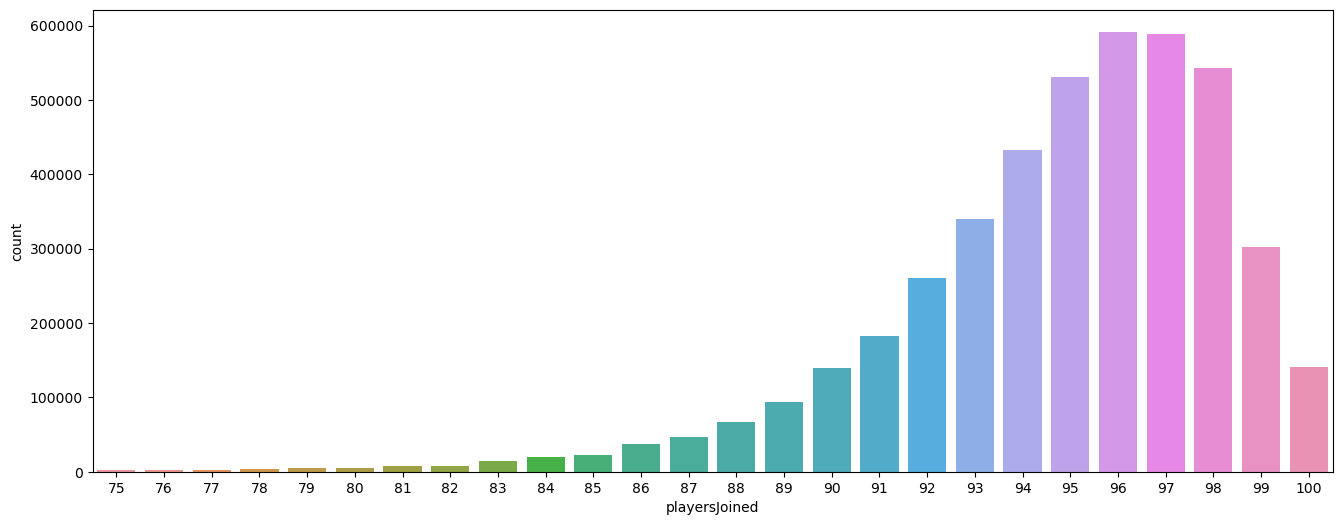

In [11]:
sns.countplot(x= df[df['playersJoined'] >= 75]['playersJoined'])
plt.show()

## Analysing the data

##### Kills Without Moving?

![Giphy image](https://media.giphy.com/media/OPRbXcsGctvZC/giphy.gif)

In [12]:
# prepare a data parameter to gather the information of the total distance travelled
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']

# prepare a data parameter to check for anamoly detection that
# the person has not moved but still managed to do the kills
df['killswithoutMoving'] = ((df['kills']>0) & (df['totalDistance'] ==0))

In [13]:
df[df['killswithoutMoving'] == True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killswithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [14]:
df[df['killswithoutMoving'] == True].shape

(1535, 32)

In [15]:
# drop the table
df.drop(df[df['killswithoutMoving'] == True].index , inplace = True)

#### Extra-ordinary Road Kills?????

![Giphy image](https://media.giphy.com/media/3o7aD85usFbbbrCR3i/giphy.gif)

In [16]:
df[df['roadKills'] > 5].shape

(46, 32)

In [17]:
df.drop(df[df['roadKills'] > 5].index, inplace = True)

#### So many KILLS - how ????

![Giphy image](https://media.giphy.com/media/3oxHQfzBhpKtgdDWtW/giphy.gif)

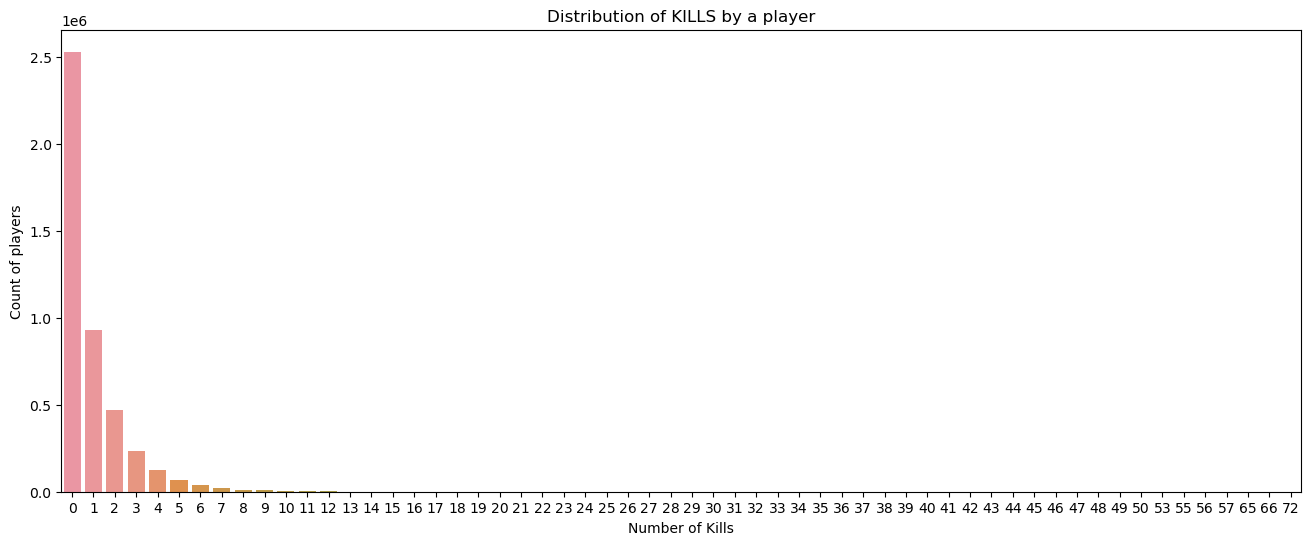

In [18]:
sns.countplot(data = df, x = df['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

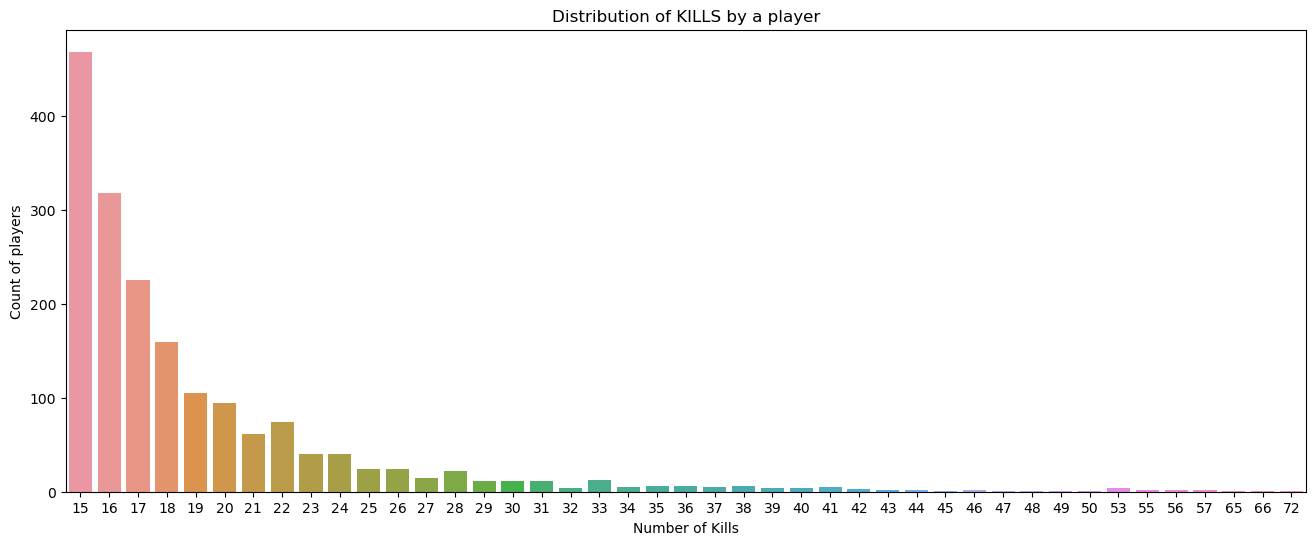

In [19]:
sns.countplot(x= df[df['kills']>=15]['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

In [20]:
# data dimension
df[df['kills'] > 20].shape

(417, 32)

In [21]:
# drop the instances
df.drop(df[df['kills'] > 20].index, inplace = True)

### Head shot

![Giphy image](https://media.giphy.com/media/l3mZrOajz5VCZf7Hy/giphy.gif)

In [22]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

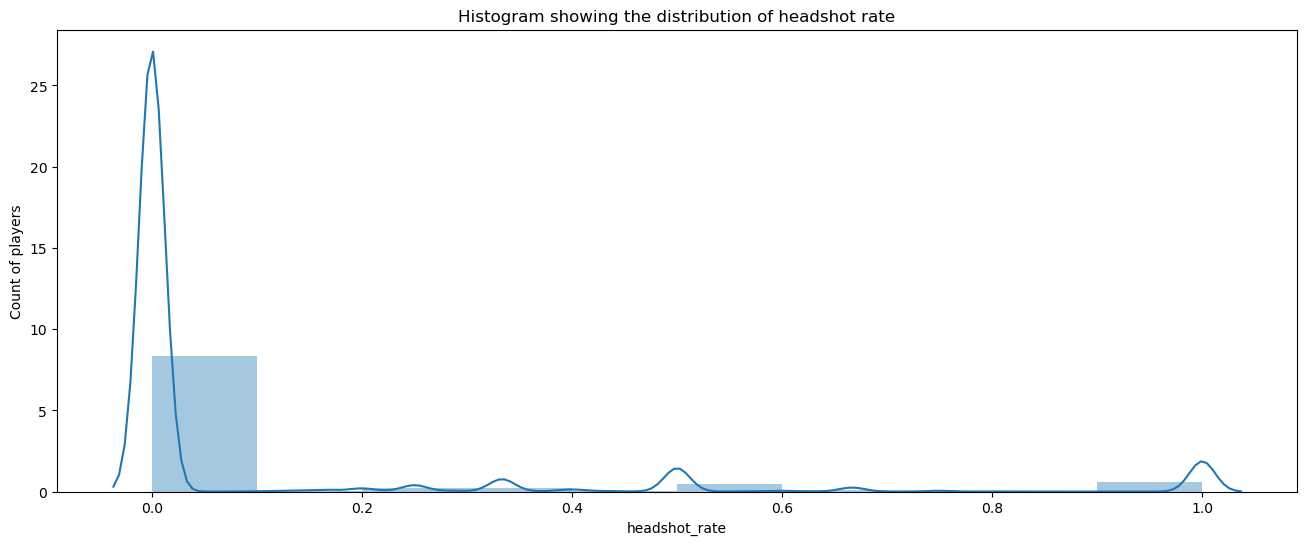

In [23]:
# plot the headshot rate distribution
sns.distplot(df['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()

In [24]:
df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape

(187, 33)

In [25]:
df.drop(df[(df['headshot_rate'] == 1)& (df['kills'] > 6)].index, inplace = True)

### Longest shot

![Giphy image](https://media.giphy.com/media/3ohs7YomxqOz4GRHcQ/giphy.gif)

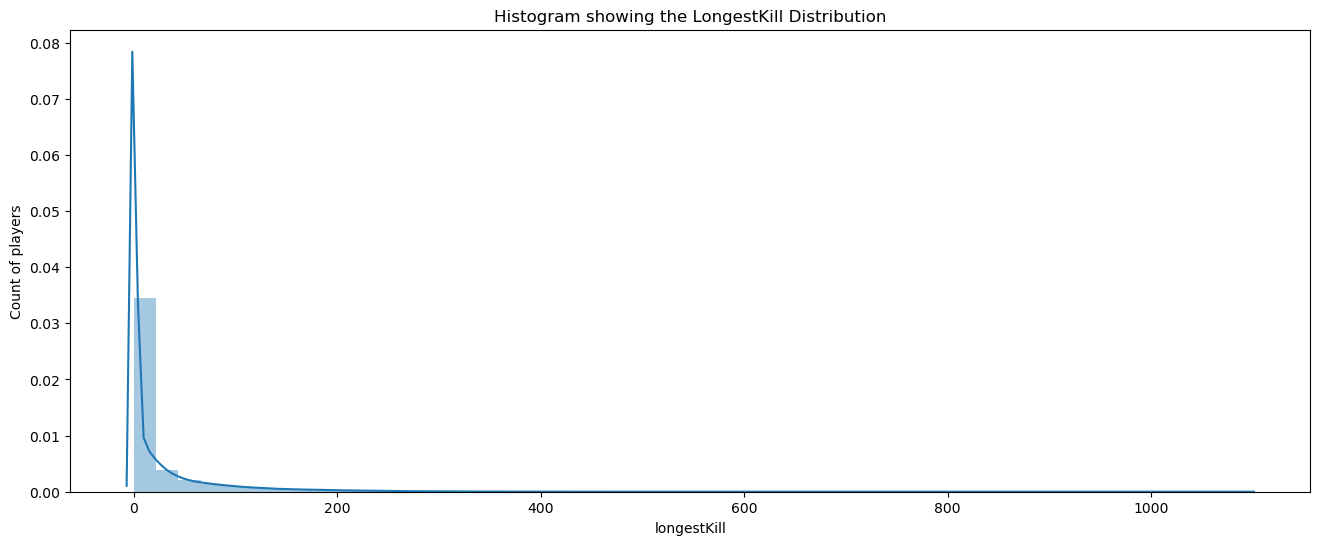

In [26]:
sns.distplot(df['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

In [27]:
df[df['longestKill']>=500].shape

(1747, 33)

In [28]:
df.drop(df[df['longestKill']>=500].index, inplace = True)

#### Weapon Change

![Giphy image](https://j.gifs.com/3loOmn.gif)

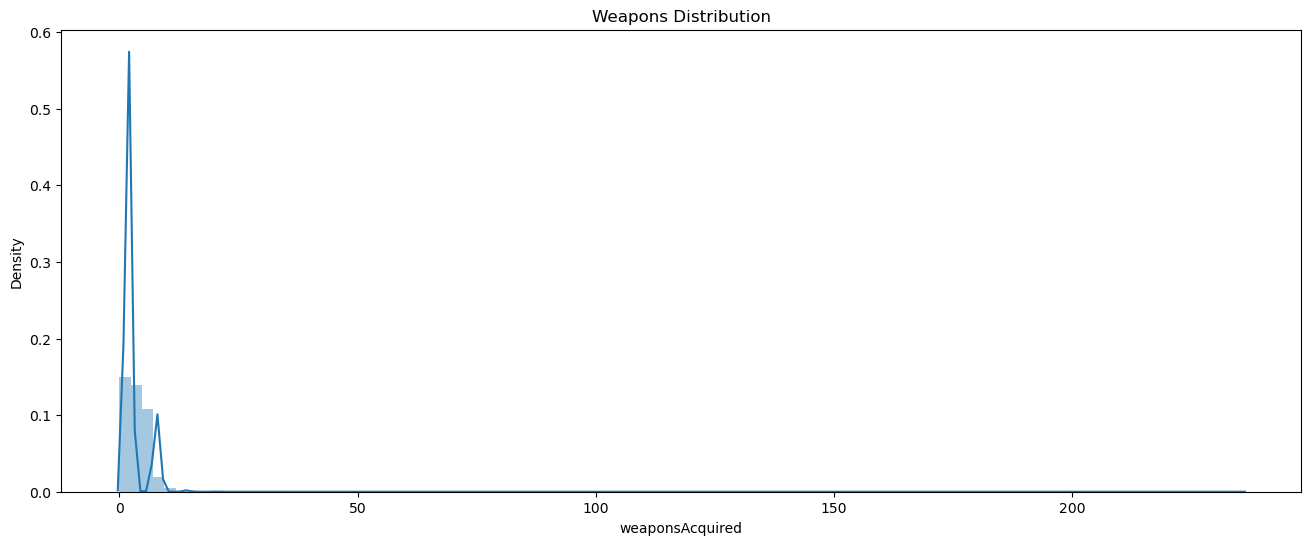

In [29]:
sns.distplot(df['weaponsAcquired'], bins=100).set_title("Weapons Distribution")
plt.show()

In [30]:
df[df['weaponsAcquired']>=15].shape

(6809, 33)

In [31]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

## EDA

In [32]:
df.shape

(4436306, 33)

In [33]:
df.isna().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
playersJoined         0
totalDistance         0
killswithoutMoving    0
headshot_rate         0
dtype: int64

In [34]:
data=df.copy()

In [35]:
#non_numeric_cols = df.select_dtypes(exclude=['number']).columns
#df = df.drop(non_numeric_cols, axis=1)

In [36]:
print(df.dtypes)

Id                     object
groupId                object
matchId                object
assists                 int64
boosts                  int64
damageDealt           float64
DBNOs                   int64
headshotKills           int64
heals                   int64
killPlace               int64
killPoints              int64
kills                   int64
killStreaks             int64
longestKill           float64
matchDuration           int64
matchType              object
maxPlace                int64
numGroups               int64
rankPoints              int64
revives                 int64
rideDistance          float64
roadKills               int64
swimDistance          float64
teamKills               int64
vehicleDestroys         int64
walkDistance          float64
weaponsAcquired         int64
winPoints               int64
winPlacePerc          float64
playersJoined           int64
totalDistance         float64
killswithoutMoving       bool
headshot_rate         float64
dtype: obj

In [37]:
df=df.drop(['Id','groupId','matchId','matchType'],axis=1)


In [38]:
print(df.dtypes)


assists                 int64
boosts                  int64
damageDealt           float64
DBNOs                   int64
headshotKills           int64
heals                   int64
killPlace               int64
killPoints              int64
kills                   int64
killStreaks             int64
longestKill           float64
matchDuration           int64
maxPlace                int64
numGroups               int64
rankPoints              int64
revives                 int64
rideDistance          float64
roadKills               int64
swimDistance          float64
teamKills               int64
vehicleDestroys         int64
walkDistance          float64
weaponsAcquired         int64
winPoints               int64
winPlacePerc          float64
playersJoined           int64
totalDistance         float64
killswithoutMoving       bool
headshot_rate         float64
dtype: object


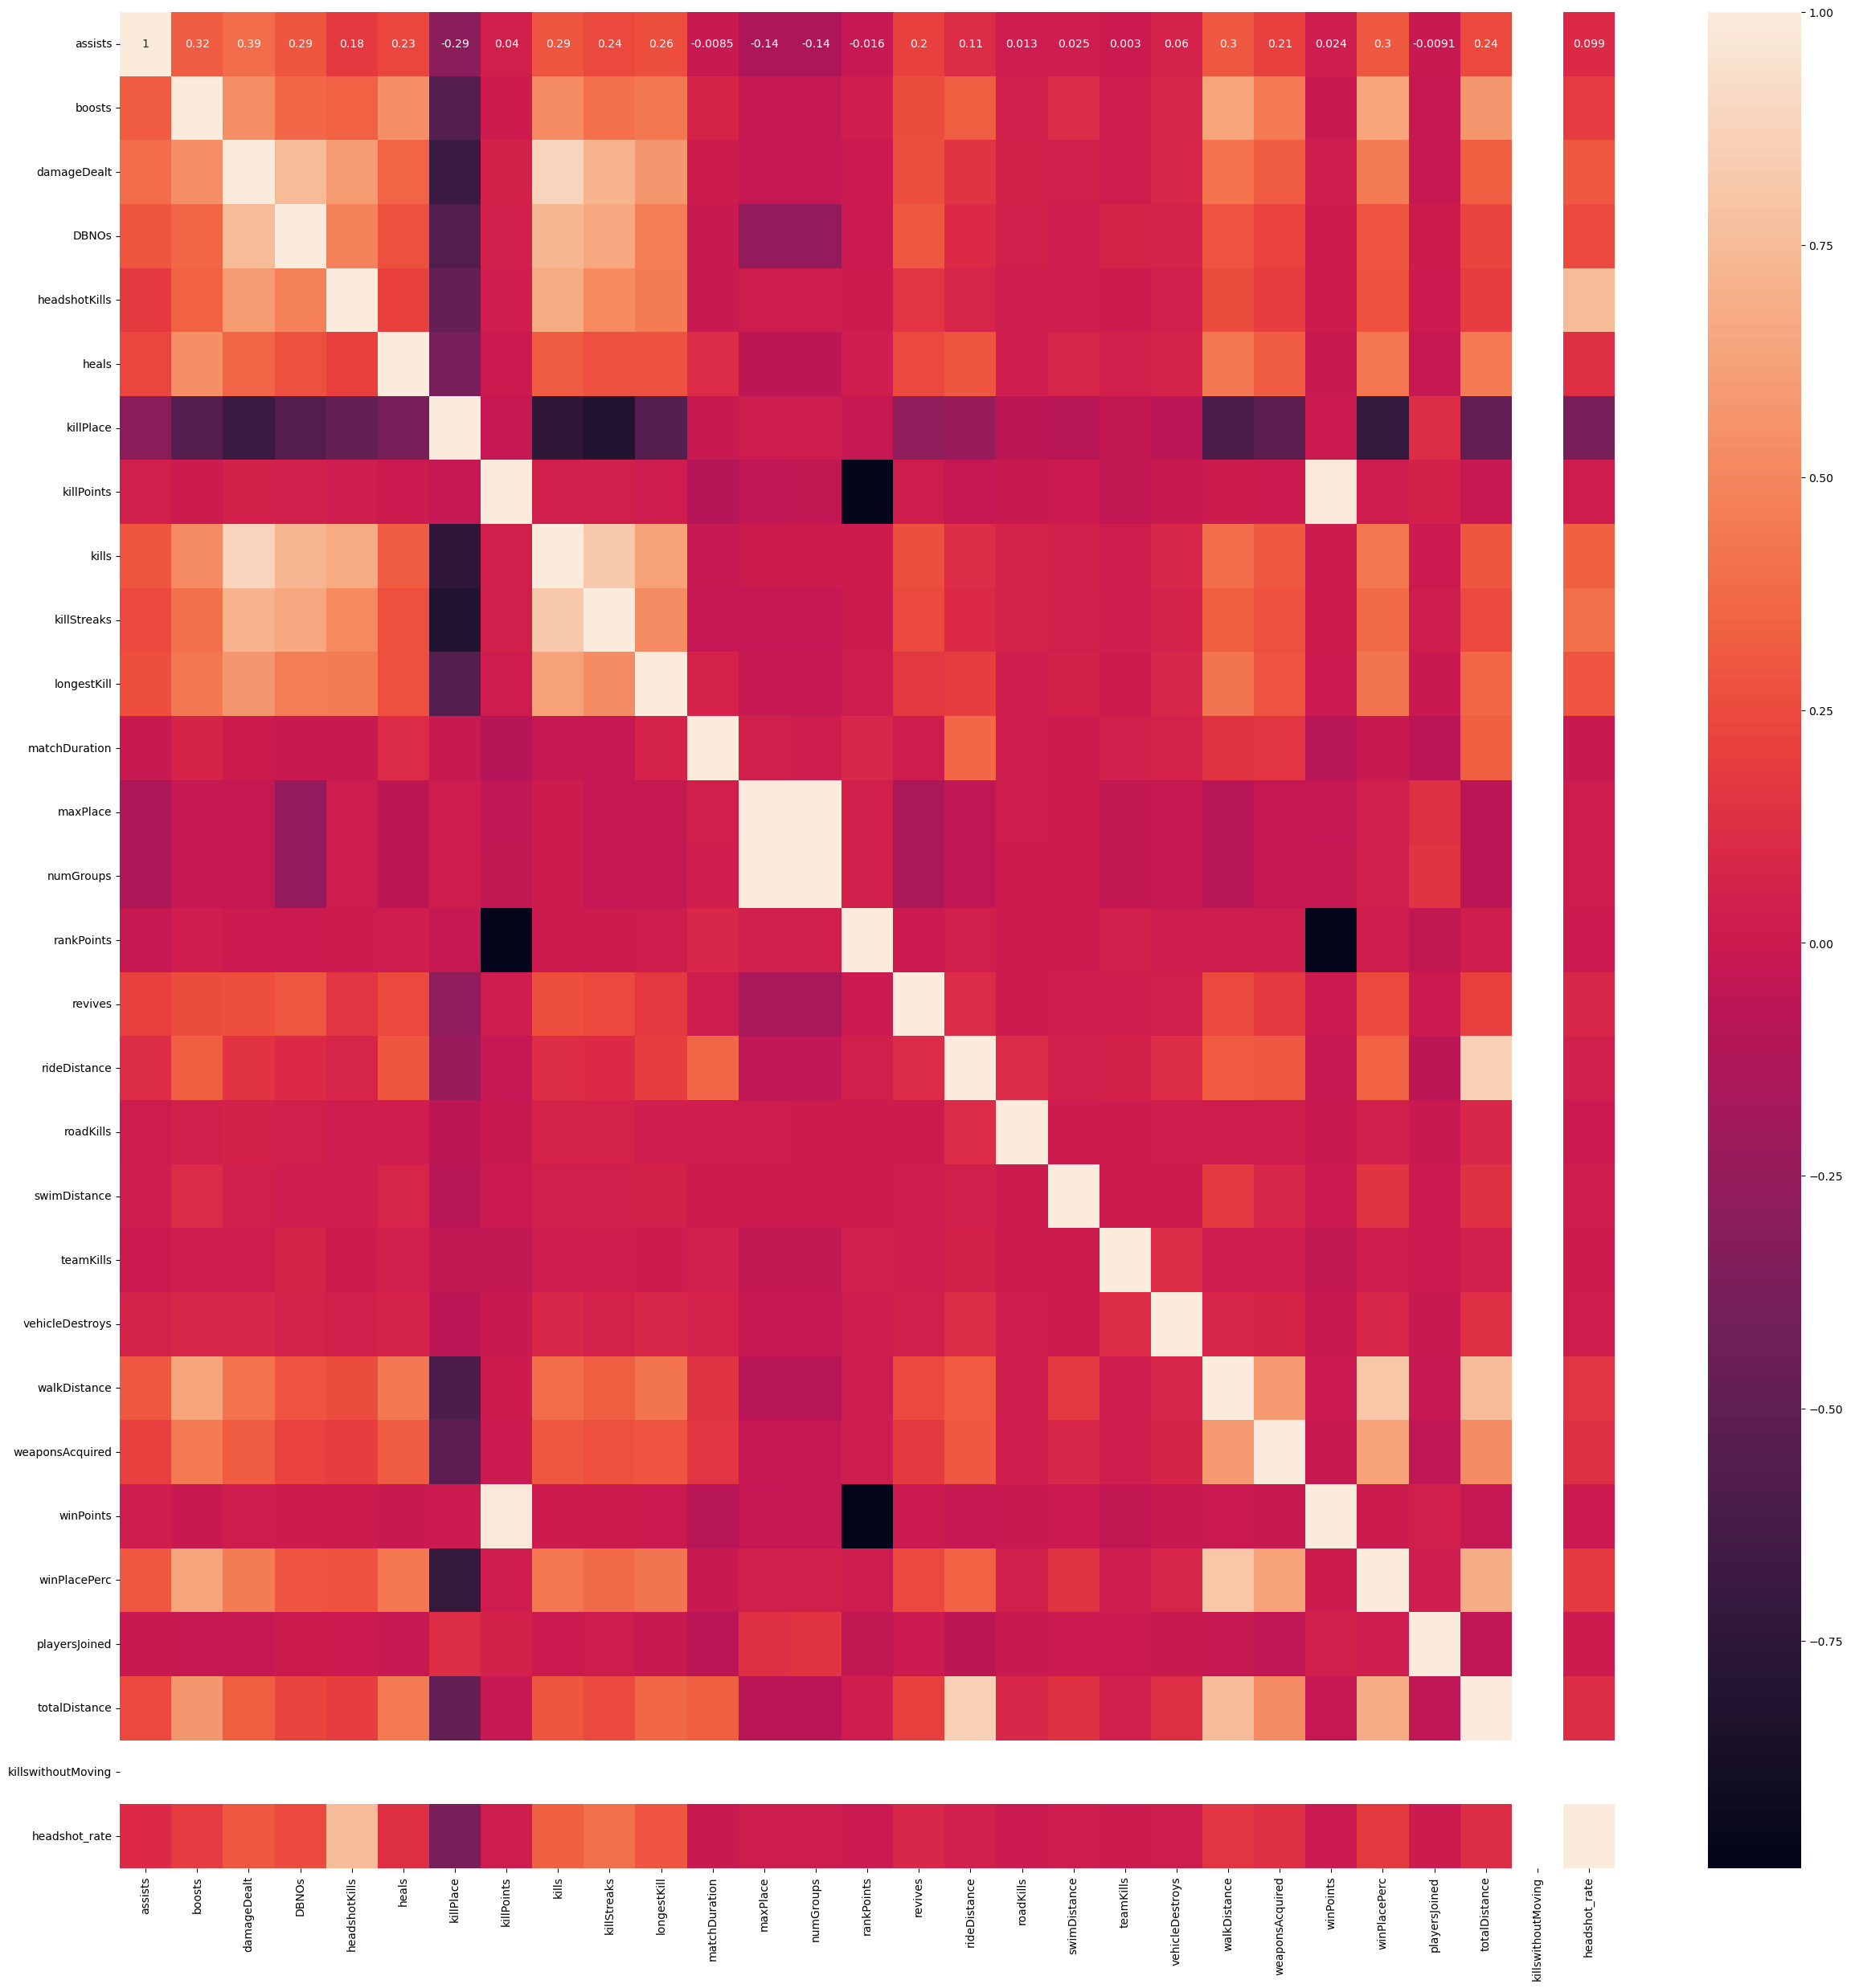

In [39]:
# correlation of parameter with Win Prediction

plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot = True)
plt.show()

# <font color = "green">Feature Engineering</font><a class = "anchor" id = "feature"></a>

In [40]:
normalising_factor = (100 - df['playersJoined']/100)+1

In [41]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [42]:
df.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'playersJoined', 'totalDistance', 'killswithoutMoving',
       'headshot_rate', 'killsNorm', 'damageDealtNorm', 'maxPlaceNorm',
       'matchDurationNorm', 'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [43]:
data = df.drop(columns = ['assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'],axis=1)

In [44]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,totalDistance,killswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,26,-1,0,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,25,1484,0,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,47,1491,0,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,30,1408,0,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,95,1560,0,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


In [45]:
df.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,totalDistance,killswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,0.00,0,0,0,60,1241,0,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,91.47,0,0,0,57,0,0,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,1,0,68.00,0,0,0,47,0,0,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,32.90,0,0,0,75,0,0,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,100.00,0,0,0,45,0,1,1,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


# <font color = "green">ML - Catboost Model</font><a class = "anchor" id = "cat"></a>

#### Handling categorical data

In [46]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']


In [47]:
print(x.columns)

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'numGroups', 'rankPoints', 'roadKills', 'teamKills',
       'vehicleDestroys', 'weaponsAcquired', 'winPoints', 'playersJoined',
       'totalDistance', 'killswithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')


In [49]:
x = pd.get_dummies(x, columns = [ 'killswithoutMoving'])

In [51]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,totalDistance,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist,killswithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,244.8000,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0,True
1,0,0,57,0,0,0.00,25,1484,0,0,...,1445.0445,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0,True
2,0,0,47,0,0,0.00,47,1491,0,0,...,161.8000,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1,True
3,0,0,75,0,0,0.00,30,1408,0,0,...,202.7000,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0,True
4,0,0,45,0,1,58.53,95,1560,0,0,...,49.7500,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0,True


In [52]:
x.shape

(4436306, 24)

In [53]:
features = x.columns

#### Scaling the data

In [55]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.3, random_state = 0)

In [56]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(3105414, 24) (3105414,)
(1330892, 24) (1330892,)


## CatBoost Model

In [57]:
import catboost as cb

In [58]:
train_dataset = cb.Pool(xtrain, ytrain)
test_dataset = cb.Pool(xtest, ytest)

In [59]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [60]:
# GRID Search

grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5481775	test: 0.5479642	best: 0.5479642 (0)	total: 241ms	remaining: 23.8s
1:	learn: 0.5333312	test: 0.5331285	best: 0.5331285 (1)	total: 307ms	remaining: 15s
2:	learn: 0.5189746	test: 0.5187823	best: 0.5187823 (2)	total: 369ms	remaining: 11.9s
3:	learn: 0.5050575	test: 0.5048724	best: 0.5048724 (3)	total: 431ms	remaining: 10.4s
4:	learn: 0.4916206	test: 0.4914420	best: 0.4914420 (4)	total: 497ms	remaining: 9.44s
5:	learn: 0.4786224	test: 0.4784483	best: 0.4784483 (5)	total: 558ms	remaining: 8.75s
6:	learn: 0.4660196	test: 0.4658511	best: 0.4658511 (6)	total: 621ms	remaining: 8.25s
7:	learn: 0.4538075	test: 0.4536426	best: 0.4536426 (7)	total: 686ms	remaining: 7.89s
8:	learn: 0.4420288	test: 0.4418704	best: 0.4418704 (8)	total: 750ms	remaining: 7.58s
9:	learn: 0.4306046	test: 0.4304504	best: 0.4304504 (9)	total: 811ms	remaining: 7.3s
10:	learn: 0.4195761	test: 0.4194281	best: 0.4194281 (10)	total: 874ms	remaining: 7.07s
11:	learn: 0.4088899	test: 0.4087467	best: 0.4087467 (1

94:	learn: 0.1397208	test: 0.1398135	best: 0.1398135 (94)	total: 6.47s	remaining: 341ms
95:	learn: 0.1393373	test: 0.1394321	best: 0.1394321 (95)	total: 6.55s	remaining: 273ms
96:	learn: 0.1389654	test: 0.1390611	best: 0.1390611 (96)	total: 6.61s	remaining: 204ms
97:	learn: 0.1386001	test: 0.1386962	best: 0.1386962 (97)	total: 6.68s	remaining: 136ms
98:	learn: 0.1382077	test: 0.1383048	best: 0.1383048 (98)	total: 6.75s	remaining: 68.2ms
99:	learn: 0.1378740	test: 0.1379718	best: 0.1379718 (99)	total: 6.82s	remaining: 0us

bestTest = 0.1379718063
bestIteration = 99

0:	loss: 0.1379718	best: 0.1379718 (0)	total: 7.75s	remaining: 1m 56s
0:	learn: 0.5125237	test: 0.5123258	best: 0.5123258 (0)	total: 72.7ms	remaining: 7.2s
1:	learn: 0.4670357	test: 0.4668708	best: 0.4668708 (1)	total: 140ms	remaining: 6.87s
2:	learn: 0.4265233	test: 0.4263845	best: 0.4263845 (2)	total: 203ms	remaining: 6.56s
3:	learn: 0.3902415	test: 0.3901169	best: 0.3901169 (3)	total: 268ms	remaining: 6.44s
4:	learn: 0.35

88:	learn: 0.1173174	test: 0.1175174	best: 0.1175174 (88)	total: 5.73s	remaining: 709ms
89:	learn: 0.1172189	test: 0.1174178	best: 0.1174178 (89)	total: 5.79s	remaining: 644ms
90:	learn: 0.1171134	test: 0.1173153	best: 0.1173153 (90)	total: 5.86s	remaining: 579ms
91:	learn: 0.1170201	test: 0.1172231	best: 0.1172231 (91)	total: 5.92s	remaining: 515ms
92:	learn: 0.1169110	test: 0.1171116	best: 0.1171116 (92)	total: 5.98s	remaining: 450ms
93:	learn: 0.1168163	test: 0.1170194	best: 0.1170194 (93)	total: 6.04s	remaining: 386ms
94:	learn: 0.1167209	test: 0.1169208	best: 0.1169208 (94)	total: 6.1s	remaining: 321ms
95:	learn: 0.1165731	test: 0.1167747	best: 0.1167747 (95)	total: 6.17s	remaining: 257ms
96:	learn: 0.1162776	test: 0.1164856	best: 0.1164856 (96)	total: 6.24s	remaining: 193ms
97:	learn: 0.1161988	test: 0.1164064	best: 0.1164064 (97)	total: 6.3s	remaining: 129ms
98:	learn: 0.1161228	test: 0.1163273	best: 0.1163273 (98)	total: 6.36s	remaining: 64.2ms
99:	learn: 0.1157895	test: 0.1159

82:	learn: 0.1459165	test: 0.1459960	best: 0.1459960 (82)	total: 5.54s	remaining: 4.47s
83:	learn: 0.1452595	test: 0.1453401	best: 0.1453401 (83)	total: 5.61s	remaining: 4.41s
84:	learn: 0.1446604	test: 0.1447414	best: 0.1447414 (84)	total: 5.67s	remaining: 4.33s
85:	learn: 0.1440537	test: 0.1441351	best: 0.1441351 (85)	total: 5.73s	remaining: 4.26s
86:	learn: 0.1435203	test: 0.1436010	best: 0.1436010 (86)	total: 5.79s	remaining: 4.19s
87:	learn: 0.1429897	test: 0.1430745	best: 0.1430745 (87)	total: 5.85s	remaining: 4.12s
88:	learn: 0.1424923	test: 0.1425779	best: 0.1425779 (88)	total: 5.91s	remaining: 4.05s
89:	learn: 0.1420102	test: 0.1420987	best: 0.1420987 (89)	total: 5.98s	remaining: 3.99s
90:	learn: 0.1414861	test: 0.1415759	best: 0.1415759 (90)	total: 6.05s	remaining: 3.92s
91:	learn: 0.1410313	test: 0.1411216	best: 0.1411216 (91)	total: 6.11s	remaining: 3.85s
92:	learn: 0.1405965	test: 0.1406882	best: 0.1406882 (92)	total: 6.19s	remaining: 3.79s
93:	learn: 0.1401354	test: 0.140

27:	learn: 0.1394373	test: 0.1395382	best: 0.1395382 (27)	total: 1.93s	remaining: 8.42s
28:	learn: 0.1382306	test: 0.1383341	best: 0.1383341 (28)	total: 2s	remaining: 8.33s
29:	learn: 0.1371410	test: 0.1372495	best: 0.1372495 (29)	total: 2.07s	remaining: 8.28s
30:	learn: 0.1361854	test: 0.1362950	best: 0.1362950 (30)	total: 2.14s	remaining: 8.22s
31:	learn: 0.1352333	test: 0.1353478	best: 0.1353478 (31)	total: 2.21s	remaining: 8.15s
32:	learn: 0.1344166	test: 0.1345270	best: 0.1345270 (32)	total: 2.27s	remaining: 8.06s
33:	learn: 0.1337033	test: 0.1338244	best: 0.1338244 (33)	total: 2.34s	remaining: 7.97s
34:	learn: 0.1330003	test: 0.1331295	best: 0.1331295 (34)	total: 2.4s	remaining: 7.9s
35:	learn: 0.1319252	test: 0.1320725	best: 0.1320725 (35)	total: 2.47s	remaining: 7.83s
36:	learn: 0.1313267	test: 0.1314706	best: 0.1314706 (36)	total: 2.53s	remaining: 7.74s
37:	learn: 0.1306843	test: 0.1308317	best: 0.1308317 (37)	total: 2.6s	remaining: 7.65s
38:	learn: 0.1301562	test: 0.1303191	b

121:	learn: 0.1129082	test: 0.1131070	best: 0.1131070 (121)	total: 7.83s	remaining: 1.8s
122:	learn: 0.1128417	test: 0.1130384	best: 0.1130384 (122)	total: 7.88s	remaining: 1.73s
123:	learn: 0.1127508	test: 0.1129469	best: 0.1129469 (123)	total: 7.95s	remaining: 1.67s
124:	learn: 0.1124269	test: 0.1126254	best: 0.1126254 (124)	total: 8.01s	remaining: 1.6s
125:	learn: 0.1123504	test: 0.1125483	best: 0.1125483 (125)	total: 8.07s	remaining: 1.54s
126:	learn: 0.1122984	test: 0.1124950	best: 0.1124950 (126)	total: 8.13s	remaining: 1.47s
127:	learn: 0.1122370	test: 0.1124301	best: 0.1124301 (127)	total: 8.19s	remaining: 1.41s
128:	learn: 0.1121812	test: 0.1123734	best: 0.1123734 (128)	total: 8.24s	remaining: 1.34s
129:	learn: 0.1120538	test: 0.1122421	best: 0.1122421 (129)	total: 8.3s	remaining: 1.28s
130:	learn: 0.1119999	test: 0.1121875	best: 0.1121875 (130)	total: 8.37s	remaining: 1.21s
131:	learn: 0.1119389	test: 0.1121259	best: 0.1121259 (131)	total: 8.43s	remaining: 1.15s
132:	learn: 0

63:	learn: 0.1484218	test: 0.1485456	best: 0.1485456 (63)	total: 6.91s	remaining: 3.88s
64:	learn: 0.1469643	test: 0.1470900	best: 0.1470900 (64)	total: 7s	remaining: 3.77s
65:	learn: 0.1455265	test: 0.1456560	best: 0.1456560 (65)	total: 7.1s	remaining: 3.65s
66:	learn: 0.1440616	test: 0.1441981	best: 0.1441981 (66)	total: 7.21s	remaining: 3.55s
67:	learn: 0.1427462	test: 0.1428879	best: 0.1428879 (67)	total: 7.3s	remaining: 3.44s
68:	learn: 0.1413646	test: 0.1415158	best: 0.1415158 (68)	total: 7.41s	remaining: 3.33s
69:	learn: 0.1401812	test: 0.1403355	best: 0.1403355 (69)	total: 7.5s	remaining: 3.21s
70:	learn: 0.1390306	test: 0.1391894	best: 0.1391894 (70)	total: 7.6s	remaining: 3.1s
71:	learn: 0.1378401	test: 0.1380041	best: 0.1380041 (71)	total: 7.71s	remaining: 3s
72:	learn: 0.1368195	test: 0.1369849	best: 0.1369849 (72)	total: 7.81s	remaining: 2.89s
73:	learn: 0.1358333	test: 0.1360001	best: 0.1360001 (73)	total: 7.91s	remaining: 2.78s
74:	learn: 0.1348985	test: 0.1350663	best: 

56:	learn: 0.1047396	test: 0.1049849	best: 0.1049849 (56)	total: 6.12s	remaining: 4.62s
57:	learn: 0.1045199	test: 0.1047666	best: 0.1047666 (57)	total: 6.21s	remaining: 4.5s
58:	learn: 0.1043068	test: 0.1045475	best: 0.1045475 (58)	total: 6.3s	remaining: 4.38s
59:	learn: 0.1041563	test: 0.1043981	best: 0.1043981 (59)	total: 6.39s	remaining: 4.26s
60:	learn: 0.1040033	test: 0.1042469	best: 0.1042469 (60)	total: 6.48s	remaining: 4.14s
61:	learn: 0.1036390	test: 0.1038832	best: 0.1038832 (61)	total: 6.58s	remaining: 4.03s
62:	learn: 0.1034241	test: 0.1036649	best: 0.1036649 (62)	total: 6.67s	remaining: 3.92s
63:	learn: 0.1030210	test: 0.1032568	best: 0.1032568 (63)	total: 6.76s	remaining: 3.8s
64:	learn: 0.1028024	test: 0.1030396	best: 0.1030396 (64)	total: 6.87s	remaining: 3.7s
65:	learn: 0.1026367	test: 0.1028732	best: 0.1028732 (65)	total: 6.97s	remaining: 3.59s
66:	learn: 0.1024876	test: 0.1027242	best: 0.1027242 (66)	total: 7.05s	remaining: 3.47s
67:	learn: 0.1020747	test: 0.1023163

50:	learn: 0.1746792	test: 0.1747513	best: 0.1747513 (50)	total: 5.66s	remaining: 11s
51:	learn: 0.1721179	test: 0.1721945	best: 0.1721945 (51)	total: 5.77s	remaining: 10.9s
52:	learn: 0.1696586	test: 0.1697385	best: 0.1697385 (52)	total: 5.89s	remaining: 10.8s
53:	learn: 0.1673423	test: 0.1674243	best: 0.1674243 (53)	total: 5.98s	remaining: 10.6s
54:	learn: 0.1650844	test: 0.1651709	best: 0.1651709 (54)	total: 6.09s	remaining: 10.5s
55:	learn: 0.1629347	test: 0.1630233	best: 0.1630233 (55)	total: 6.21s	remaining: 10.4s
56:	learn: 0.1609087	test: 0.1610040	best: 0.1610040 (56)	total: 6.31s	remaining: 10.3s
57:	learn: 0.1588597	test: 0.1589575	best: 0.1589575 (57)	total: 6.44s	remaining: 10.2s
58:	learn: 0.1569382	test: 0.1570398	best: 0.1570398 (58)	total: 6.54s	remaining: 10.1s
59:	learn: 0.1550683	test: 0.1551739	best: 0.1551739 (59)	total: 6.64s	remaining: 9.96s
60:	learn: 0.1532022	test: 0.1533163	best: 0.1533163 (60)	total: 6.75s	remaining: 9.85s
61:	learn: 0.1515464	test: 0.15166

144:	learn: 0.1097342	test: 0.1099542	best: 0.1099542 (144)	total: 15.1s	remaining: 520ms
145:	learn: 0.1095464	test: 0.1097666	best: 0.1097666 (145)	total: 15.2s	remaining: 416ms
146:	learn: 0.1093841	test: 0.1096032	best: 0.1096032 (146)	total: 15.3s	remaining: 312ms
147:	learn: 0.1092539	test: 0.1094722	best: 0.1094722 (147)	total: 15.4s	remaining: 208ms
148:	learn: 0.1091585	test: 0.1093762	best: 0.1093762 (148)	total: 15.4s	remaining: 104ms
149:	learn: 0.1089897	test: 0.1092098	best: 0.1092098 (149)	total: 15.5s	remaining: 0us

bestTest = 0.1092097591
bestIteration = 149

6:	loss: 0.1092098	best: 0.0963143 (5)	total: 1m 11s	remaining: 1m 31s
0:	learn: 0.5113554	test: 0.5111603	best: 0.5111603 (0)	total: 114ms	remaining: 17s
1:	learn: 0.4646970	test: 0.4645365	best: 0.4645365 (1)	total: 223ms	remaining: 16.5s
2:	learn: 0.4231210	test: 0.4229882	best: 0.4229882 (2)	total: 321ms	remaining: 15.7s
3:	learn: 0.3859628	test: 0.3858585	best: 0.3858585 (3)	total: 433ms	remaining: 15.8s
4:	

89:	learn: 0.0977827	test: 0.0980165	best: 0.0980165 (89)	total: 9.04s	remaining: 6.03s
90:	learn: 0.0976608	test: 0.0978956	best: 0.0978956 (90)	total: 9.15s	remaining: 5.93s
91:	learn: 0.0974407	test: 0.0976745	best: 0.0976745 (91)	total: 9.24s	remaining: 5.83s
92:	learn: 0.0972170	test: 0.0974504	best: 0.0974504 (92)	total: 9.33s	remaining: 5.72s
93:	learn: 0.0971278	test: 0.0973616	best: 0.0973616 (93)	total: 9.43s	remaining: 5.62s
94:	learn: 0.0969343	test: 0.0971678	best: 0.0971678 (94)	total: 9.54s	remaining: 5.53s
95:	learn: 0.0968445	test: 0.0970791	best: 0.0970791 (95)	total: 9.62s	remaining: 5.41s
96:	learn: 0.0964794	test: 0.0967178	best: 0.0967178 (96)	total: 9.74s	remaining: 5.32s
97:	learn: 0.0963035	test: 0.0965395	best: 0.0965395 (97)	total: 9.84s	remaining: 5.22s
98:	learn: 0.0961341	test: 0.0963675	best: 0.0963675 (98)	total: 9.92s	remaining: 5.11s
99:	learn: 0.0960821	test: 0.0963143	best: 0.0963143 (99)	total: 10s	remaining: 5.01s
100:	learn: 0.0959978	test: 0.0962

32:	learn: 0.2373593	test: 0.2374010	best: 0.2374010 (32)	total: 5.16s	remaining: 10.5s
33:	learn: 0.2321026	test: 0.2321485	best: 0.2321485 (33)	total: 5.32s	remaining: 10.3s
34:	learn: 0.2270250	test: 0.2270769	best: 0.2270769 (34)	total: 5.48s	remaining: 10.2s
35:	learn: 0.2221502	test: 0.2222077	best: 0.2222077 (35)	total: 5.63s	remaining: 10s
36:	learn: 0.2174308	test: 0.2174939	best: 0.2174939 (36)	total: 5.8s	remaining: 9.87s
37:	learn: 0.2128461	test: 0.2129155	best: 0.2129155 (37)	total: 5.96s	remaining: 9.73s
38:	learn: 0.2084473	test: 0.2085222	best: 0.2085222 (38)	total: 6.12s	remaining: 9.57s
39:	learn: 0.2041316	test: 0.2042131	best: 0.2042131 (39)	total: 6.27s	remaining: 9.41s
40:	learn: 0.2000398	test: 0.2001306	best: 0.2001306 (40)	total: 6.43s	remaining: 9.25s
41:	learn: 0.1961369	test: 0.1962305	best: 0.1962305 (41)	total: 6.58s	remaining: 9.08s
42:	learn: 0.1923557	test: 0.1924520	best: 0.1924520 (42)	total: 6.73s	remaining: 8.92s
43:	learn: 0.1887375	test: 0.188838

26:	learn: 0.1115971	test: 0.1118236	best: 0.1118236 (26)	total: 4.13s	remaining: 11.2s
27:	learn: 0.1101337	test: 0.1103679	best: 0.1103679 (27)	total: 4.26s	remaining: 11s
28:	learn: 0.1087882	test: 0.1090280	best: 0.1090280 (28)	total: 4.39s	remaining: 10.7s
29:	learn: 0.1076047	test: 0.1078479	best: 0.1078479 (29)	total: 4.53s	remaining: 10.6s
30:	learn: 0.1065367	test: 0.1067872	best: 0.1067872 (30)	total: 4.66s	remaining: 10.4s
31:	learn: 0.1054184	test: 0.1056638	best: 0.1056638 (31)	total: 4.82s	remaining: 10.2s
32:	learn: 0.1046645	test: 0.1049115	best: 0.1049115 (32)	total: 4.96s	remaining: 10.1s
33:	learn: 0.1038801	test: 0.1041321	best: 0.1041321 (33)	total: 5.1s	remaining: 9.9s
34:	learn: 0.1032063	test: 0.1034552	best: 0.1034552 (34)	total: 5.24s	remaining: 9.73s
35:	learn: 0.1026119	test: 0.1028612	best: 0.1028612 (35)	total: 5.4s	remaining: 9.59s
36:	learn: 0.1020215	test: 0.1022766	best: 0.1022766 (36)	total: 5.53s	remaining: 9.42s
37:	learn: 0.1014720	test: 0.1017205	

20:	learn: 0.3175536	test: 0.3175063	best: 0.3175063 (20)	total: 3.25s	remaining: 20s
21:	learn: 0.3095232	test: 0.3094810	best: 0.3094810 (21)	total: 3.41s	remaining: 19.8s
22:	learn: 0.3017788	test: 0.3017429	best: 0.3017429 (22)	total: 3.57s	remaining: 19.7s
23:	learn: 0.2942750	test: 0.2942499	best: 0.2942499 (23)	total: 3.72s	remaining: 19.6s
24:	learn: 0.2870507	test: 0.2870336	best: 0.2870336 (24)	total: 3.88s	remaining: 19.4s
25:	learn: 0.2800491	test: 0.2800415	best: 0.2800415 (25)	total: 4.03s	remaining: 19.2s
26:	learn: 0.2732788	test: 0.2732778	best: 0.2732778 (26)	total: 4.2s	remaining: 19.1s
27:	learn: 0.2667766	test: 0.2667816	best: 0.2667816 (27)	total: 4.35s	remaining: 19s
28:	learn: 0.2604879	test: 0.2605012	best: 0.2605012 (28)	total: 4.51s	remaining: 18.8s
29:	learn: 0.2544392	test: 0.2544585	best: 0.2544585 (29)	total: 4.64s	remaining: 18.6s
30:	learn: 0.2485252	test: 0.2485536	best: 0.2485536 (30)	total: 4.8s	remaining: 18.4s
31:	learn: 0.2428570	test: 0.2428901	b

114:	learn: 0.1047073	test: 0.1049567	best: 0.1049567 (114)	total: 17.3s	remaining: 5.25s
115:	learn: 0.1045062	test: 0.1047567	best: 0.1047567 (115)	total: 17.4s	remaining: 5.1s
116:	learn: 0.1042862	test: 0.1045351	best: 0.1045351 (116)	total: 17.5s	remaining: 4.95s
117:	learn: 0.1040557	test: 0.1043031	best: 0.1043031 (117)	total: 17.7s	remaining: 4.79s
118:	learn: 0.1038060	test: 0.1040529	best: 0.1040529 (118)	total: 17.8s	remaining: 4.65s
119:	learn: 0.1035851	test: 0.1038316	best: 0.1038316 (119)	total: 18s	remaining: 4.5s
120:	learn: 0.1033649	test: 0.1036118	best: 0.1036118 (120)	total: 18.1s	remaining: 4.35s
121:	learn: 0.1032108	test: 0.1034572	best: 0.1034572 (121)	total: 18.3s	remaining: 4.19s
122:	learn: 0.1029955	test: 0.1032422	best: 0.1032422 (122)	total: 18.4s	remaining: 4.04s
123:	learn: 0.1028041	test: 0.1030509	best: 0.1030509 (123)	total: 18.5s	remaining: 3.88s
124:	learn: 0.1025667	test: 0.1028093	best: 0.1028093 (124)	total: 18.7s	remaining: 3.73s
125:	learn: 0.

56:	learn: 0.0945087	test: 0.0947110	best: 0.0947110 (56)	total: 8.48s	remaining: 13.8s
57:	learn: 0.0940453	test: 0.0942445	best: 0.0942445 (57)	total: 8.64s	remaining: 13.7s
58:	learn: 0.0938989	test: 0.0940974	best: 0.0940974 (58)	total: 8.79s	remaining: 13.6s
59:	learn: 0.0936102	test: 0.0937951	best: 0.0937951 (59)	total: 8.91s	remaining: 13.4s
60:	learn: 0.0934001	test: 0.0935875	best: 0.0935875 (60)	total: 9.02s	remaining: 13.2s
61:	learn: 0.0932556	test: 0.0934412	best: 0.0934412 (61)	total: 9.15s	remaining: 13s
62:	learn: 0.0930971	test: 0.0932830	best: 0.0932830 (62)	total: 9.32s	remaining: 12.9s
63:	learn: 0.0928882	test: 0.0930716	best: 0.0930716 (63)	total: 9.46s	remaining: 12.7s
64:	learn: 0.0926520	test: 0.0928398	best: 0.0928398 (64)	total: 9.59s	remaining: 12.5s
65:	learn: 0.0922733	test: 0.0924541	best: 0.0924541 (65)	total: 9.75s	remaining: 12.4s
66:	learn: 0.0920600	test: 0.0922426	best: 0.0922426 (66)	total: 9.91s	remaining: 12.3s
67:	learn: 0.0918565	test: 0.09203

0:	learn: 0.5476004	test: 0.5473871	best: 0.5473871 (0)	total: 183ms	remaining: 18.1s
1:	learn: 0.5320917	test: 0.5318910	best: 0.5318910 (1)	total: 365ms	remaining: 17.9s
2:	learn: 0.5170458	test: 0.5168563	best: 0.5168563 (2)	total: 543ms	remaining: 17.6s
3:	learn: 0.5025142	test: 0.5023324	best: 0.5023324 (3)	total: 726ms	remaining: 17.4s
4:	learn: 0.4884621	test: 0.4882907	best: 0.4882907 (4)	total: 907ms	remaining: 17.2s
5:	learn: 0.4748032	test: 0.4746389	best: 0.4746389 (5)	total: 1.08s	remaining: 16.9s
6:	learn: 0.4615482	test: 0.4613935	best: 0.4613935 (6)	total: 1.25s	remaining: 16.7s
7:	learn: 0.4487391	test: 0.4485951	best: 0.4485951 (7)	total: 1.44s	remaining: 16.5s
8:	learn: 0.4363313	test: 0.4361951	best: 0.4361951 (8)	total: 1.62s	remaining: 16.3s
9:	learn: 0.4243304	test: 0.4242032	best: 0.4242032 (9)	total: 1.79s	remaining: 16.2s
10:	learn: 0.4127485	test: 0.4126348	best: 0.4126348 (10)	total: 1.97s	remaining: 15.9s
11:	learn: 0.4015061	test: 0.4014019	best: 0.4014019

94:	learn: 0.1039584	test: 0.1041858	best: 0.1041858 (94)	total: 16.4s	remaining: 863ms
95:	learn: 0.1035093	test: 0.1037368	best: 0.1037368 (95)	total: 16.6s	remaining: 690ms
96:	learn: 0.1031135	test: 0.1033416	best: 0.1033416 (96)	total: 16.7s	remaining: 518ms
97:	learn: 0.1026820	test: 0.1029100	best: 0.1029100 (97)	total: 16.9s	remaining: 345ms
98:	learn: 0.1022755	test: 0.1025020	best: 0.1025020 (98)	total: 17.1s	remaining: 172ms
99:	learn: 0.1018567	test: 0.1020808	best: 0.1020808 (99)	total: 17.2s	remaining: 0us

bestTest = 0.1020808404
bestIteration = 99

12:	loss: 0.1020808	best: 0.0848300 (11)	total: 2m 57s	remaining: 40.9s
0:	learn: 0.5105365	test: 0.5103385	best: 0.5103385 (0)	total: 185ms	remaining: 18.3s
1:	learn: 0.4628185	test: 0.4626579	best: 0.4626579 (1)	total: 374ms	remaining: 18.3s
2:	learn: 0.4199644	test: 0.4198349	best: 0.4198349 (2)	total: 561ms	remaining: 18.1s
3:	learn: 0.3818249	test: 0.3817175	best: 0.3817175 (3)	total: 745ms	remaining: 17.9s
4:	learn: 0.3

88:	learn: 0.0851092	test: 0.0853009	best: 0.0853009 (88)	total: 14.9s	remaining: 1.84s
89:	learn: 0.0850582	test: 0.0852503	best: 0.0852503 (89)	total: 15.1s	remaining: 1.67s
90:	learn: 0.0849880	test: 0.0851828	best: 0.0851828 (90)	total: 15.2s	remaining: 1.5s
91:	learn: 0.0849261	test: 0.0851237	best: 0.0851237 (91)	total: 15.4s	remaining: 1.33s
92:	learn: 0.0848639	test: 0.0850638	best: 0.0850638 (92)	total: 15.5s	remaining: 1.17s
93:	learn: 0.0847817	test: 0.0849795	best: 0.0849795 (93)	total: 15.7s	remaining: 1000ms
94:	learn: 0.0847174	test: 0.0849128	best: 0.0849128 (94)	total: 15.8s	remaining: 834ms
95:	learn: 0.0846561	test: 0.0848520	best: 0.0848520 (95)	total: 16s	remaining: 668ms
96:	learn: 0.0845952	test: 0.0847902	best: 0.0847902 (96)	total: 16.2s	remaining: 501ms
97:	learn: 0.0845443	test: 0.0847396	best: 0.0847396 (97)	total: 16.4s	remaining: 334ms
98:	learn: 0.0844752	test: 0.0846725	best: 0.0846725 (98)	total: 16.5s	remaining: 167ms
99:	learn: 0.0844192	test: 0.08461

82:	learn: 0.1107568	test: 0.1109794	best: 0.1109794 (82)	total: 14.7s	remaining: 11.8s
83:	learn: 0.1100841	test: 0.1103069	best: 0.1103069 (83)	total: 14.8s	remaining: 11.6s
84:	learn: 0.1094306	test: 0.1096558	best: 0.1096558 (84)	total: 15s	remaining: 11.4s
85:	learn: 0.1088066	test: 0.1090349	best: 0.1090349 (85)	total: 15.1s	remaining: 11.2s
86:	learn: 0.1081521	test: 0.1083791	best: 0.1083791 (86)	total: 15.3s	remaining: 11.1s
87:	learn: 0.1075803	test: 0.1078078	best: 0.1078078 (87)	total: 15.4s	remaining: 10.9s
88:	learn: 0.1070393	test: 0.1072693	best: 0.1072693 (88)	total: 15.6s	remaining: 10.7s
89:	learn: 0.1065108	test: 0.1067423	best: 0.1067423 (89)	total: 15.7s	remaining: 10.5s
90:	learn: 0.1059637	test: 0.1061933	best: 0.1061933 (90)	total: 15.9s	remaining: 10.3s
91:	learn: 0.1054314	test: 0.1056609	best: 0.1056609 (91)	total: 16s	remaining: 10.1s
92:	learn: 0.1049565	test: 0.1051864	best: 0.1051864 (92)	total: 16.2s	remaining: 9.93s
93:	learn: 0.1044143	test: 0.1046427

24:	learn: 0.1086767	test: 0.1088909	best: 0.1088909 (24)	total: 4.48s	remaining: 22.4s
25:	learn: 0.1064223	test: 0.1066397	best: 0.1066397 (25)	total: 4.66s	remaining: 22.2s
26:	learn: 0.1045447	test: 0.1047648	best: 0.1047648 (26)	total: 4.85s	remaining: 22.1s
27:	learn: 0.1031204	test: 0.1033504	best: 0.1033504 (27)	total: 5.02s	remaining: 21.9s
28:	learn: 0.1017799	test: 0.1020108	best: 0.1020108 (28)	total: 5.17s	remaining: 21.6s
29:	learn: 0.1007290	test: 0.1009599	best: 0.1009599 (29)	total: 5.31s	remaining: 21.2s
30:	learn: 0.0996320	test: 0.0998650	best: 0.0998650 (30)	total: 5.46s	remaining: 21s
31:	learn: 0.0987351	test: 0.0989672	best: 0.0989672 (31)	total: 5.62s	remaining: 20.7s
32:	learn: 0.0978938	test: 0.0981266	best: 0.0981266 (32)	total: 5.78s	remaining: 20.5s
33:	learn: 0.0971365	test: 0.0973636	best: 0.0973636 (33)	total: 5.95s	remaining: 20.3s
34:	learn: 0.0965174	test: 0.0967463	best: 0.0967463 (34)	total: 6.13s	remaining: 20.1s
35:	learn: 0.0959229	test: 0.09615

119:	learn: 0.0835120	test: 0.0837197	best: 0.0837197 (119)	total: 19.8s	remaining: 4.95s
120:	learn: 0.0834713	test: 0.0836795	best: 0.0836795 (120)	total: 20s	remaining: 4.79s
121:	learn: 0.0834275	test: 0.0836368	best: 0.0836368 (121)	total: 20.1s	remaining: 4.62s
122:	learn: 0.0833839	test: 0.0835919	best: 0.0835919 (122)	total: 20.3s	remaining: 4.45s
123:	learn: 0.0833568	test: 0.0835655	best: 0.0835655 (123)	total: 20.5s	remaining: 4.29s
124:	learn: 0.0833144	test: 0.0835241	best: 0.0835241 (124)	total: 20.6s	remaining: 4.12s
125:	learn: 0.0832880	test: 0.0834973	best: 0.0834973 (125)	total: 20.7s	remaining: 3.95s
126:	learn: 0.0832426	test: 0.0834541	best: 0.0834541 (126)	total: 20.9s	remaining: 3.78s
127:	learn: 0.0832133	test: 0.0834264	best: 0.0834264 (127)	total: 21.1s	remaining: 3.62s
128:	learn: 0.0831864	test: 0.0834006	best: 0.0834006 (128)	total: 21.3s	remaining: 3.46s
129:	learn: 0.0831559	test: 0.0833659	best: 0.0833659 (129)	total: 21.4s	remaining: 3.3s
130:	learn: 0

62:	learn: 0.0880771	test: 0.0881879	best: 0.0881879 (62)	total: 9.1s	remaining: 12.6s
63:	learn: 0.0879342	test: 0.0880435	best: 0.0880435 (63)	total: 9.25s	remaining: 12.4s
64:	learn: 0.0878024	test: 0.0879099	best: 0.0879099 (64)	total: 9.41s	remaining: 12.3s
65:	learn: 0.0875586	test: 0.0876708	best: 0.0876708 (65)	total: 9.54s	remaining: 12.1s
66:	learn: 0.0873811	test: 0.0874920	best: 0.0874920 (66)	total: 9.69s	remaining: 12s
67:	learn: 0.0872777	test: 0.0873972	best: 0.0873972 (67)	total: 9.81s	remaining: 11.8s
68:	learn: 0.0871760	test: 0.0872955	best: 0.0872955 (68)	total: 9.95s	remaining: 11.7s
69:	learn: 0.0870863	test: 0.0872103	best: 0.0872103 (69)	total: 10.1s	remaining: 11.5s
70:	learn: 0.0869624	test: 0.0870887	best: 0.0870887 (70)	total: 10.2s	remaining: 11.4s
71:	learn: 0.0868857	test: 0.0870117	best: 0.0870117 (71)	total: 10.4s	remaining: 11.2s
72:	learn: 0.0867906	test: 0.0869192	best: 0.0869192 (72)	total: 10.5s	remaining: 11.1s
73:	learn: 0.0866855	test: 0.086816

4:	learn: 0.3475677	test: 0.3476918	best: 0.3476918 (4)	total: 795ms	remaining: 23.1s
5:	learn: 0.3172074	test: 0.3173110	best: 0.3173110 (5)	total: 951ms	remaining: 22.8s
6:	learn: 0.2900058	test: 0.2901044	best: 0.2901044 (6)	total: 1.11s	remaining: 22.6s
7:	learn: 0.2658306	test: 0.2659112	best: 0.2659112 (7)	total: 1.26s	remaining: 22.4s
8:	learn: 0.2443128	test: 0.2443947	best: 0.2443947 (8)	total: 1.42s	remaining: 22.2s
9:	learn: 0.2252460	test: 0.2253248	best: 0.2253248 (9)	total: 1.57s	remaining: 22s
10:	learn: 0.2084774	test: 0.2085510	best: 0.2085510 (10)	total: 1.72s	remaining: 21.7s
11:	learn: 0.1936250	test: 0.1937014	best: 0.1937014 (11)	total: 1.87s	remaining: 21.5s
12:	learn: 0.1805976	test: 0.1806793	best: 0.1806793 (12)	total: 2.02s	remaining: 21.3s
13:	learn: 0.1691891	test: 0.1692828	best: 0.1692828 (13)	total: 2.17s	remaining: 21.1s
14:	learn: 0.1589391	test: 0.1590334	best: 0.1590334 (14)	total: 2.33s	remaining: 21s
15:	learn: 0.1502525	test: 0.1503450	best: 0.150

98:	learn: 0.0846197	test: 0.0848624	best: 0.0848624 (98)	total: 13.8s	remaining: 7.1s
99:	learn: 0.0845717	test: 0.0848155	best: 0.0848155 (99)	total: 13.9s	remaining: 6.97s
100:	learn: 0.0845123	test: 0.0847599	best: 0.0847599 (100)	total: 14.1s	remaining: 6.83s
101:	learn: 0.0844397	test: 0.0846903	best: 0.0846903 (101)	total: 14.2s	remaining: 6.68s
102:	learn: 0.0843883	test: 0.0846380	best: 0.0846380 (102)	total: 14.3s	remaining: 6.53s
103:	learn: 0.0843254	test: 0.0845789	best: 0.0845789 (103)	total: 14.5s	remaining: 6.39s
104:	learn: 0.0842725	test: 0.0845267	best: 0.0845267 (104)	total: 14.6s	remaining: 6.26s
105:	learn: 0.0842369	test: 0.0844922	best: 0.0844922 (105)	total: 14.7s	remaining: 6.12s
106:	learn: 0.0841601	test: 0.0844191	best: 0.0844191 (106)	total: 14.8s	remaining: 5.96s
107:	learn: 0.0840988	test: 0.0843601	best: 0.0843601 (107)	total: 15s	remaining: 5.82s
108:	learn: 0.0840538	test: 0.0843169	best: 0.0843169 (108)	total: 15.1s	remaining: 5.67s
109:	learn: 0.083

40:	learn: 0.0930658	test: 0.0929638	best: 0.0929638 (40)	total: 5.95s	remaining: 15.8s
41:	learn: 0.0926615	test: 0.0925569	best: 0.0925569 (41)	total: 6.07s	remaining: 15.6s
42:	learn: 0.0922652	test: 0.0921633	best: 0.0921633 (42)	total: 6.21s	remaining: 15.5s
43:	learn: 0.0919703	test: 0.0918685	best: 0.0918685 (43)	total: 6.34s	remaining: 15.3s
44:	learn: 0.0916669	test: 0.0915636	best: 0.0915636 (44)	total: 6.49s	remaining: 15.1s
45:	learn: 0.0913539	test: 0.0912536	best: 0.0912536 (45)	total: 6.6s	remaining: 14.9s
46:	learn: 0.0911113	test: 0.0910112	best: 0.0910112 (46)	total: 6.73s	remaining: 14.8s
47:	learn: 0.0908638	test: 0.0907661	best: 0.0907661 (47)	total: 6.86s	remaining: 14.6s
48:	learn: 0.0904341	test: 0.0903305	best: 0.0903305 (48)	total: 7.01s	remaining: 14.4s
49:	learn: 0.0900806	test: 0.0899716	best: 0.0899716 (49)	total: 7.17s	remaining: 14.3s
50:	learn: 0.0899172	test: 0.0898089	best: 0.0898089 (50)	total: 7.3s	remaining: 14.2s
51:	learn: 0.0896816	test: 0.08956

134:	learn: 0.0830028	test: 0.0829556	best: 0.0829556 (134)	total: 18.2s	remaining: 2.02s
135:	learn: 0.0829625	test: 0.0829175	best: 0.0829175 (135)	total: 18.3s	remaining: 1.89s
136:	learn: 0.0829339	test: 0.0828881	best: 0.0828881 (136)	total: 18.5s	remaining: 1.75s
137:	learn: 0.0829059	test: 0.0828607	best: 0.0828607 (137)	total: 18.6s	remaining: 1.62s
138:	learn: 0.0828833	test: 0.0828379	best: 0.0828379 (138)	total: 18.7s	remaining: 1.48s
139:	learn: 0.0828537	test: 0.0828102	best: 0.0828102 (139)	total: 18.9s	remaining: 1.35s
140:	learn: 0.0828271	test: 0.0827832	best: 0.0827832 (140)	total: 19s	remaining: 1.21s
141:	learn: 0.0828037	test: 0.0827589	best: 0.0827589 (141)	total: 19.1s	remaining: 1.08s
142:	learn: 0.0827859	test: 0.0827431	best: 0.0827431 (142)	total: 19.2s	remaining: 941ms
143:	learn: 0.0827666	test: 0.0827234	best: 0.0827234 (143)	total: 19.3s	remaining: 806ms
144:	learn: 0.0827316	test: 0.0826901	best: 0.0826901 (144)	total: 19.5s	remaining: 671ms
145:	learn: 

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [61]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending=False)

In [62]:
feature_importance_df

,features,importance
2,killPlace,41.577478
20,traveldistance,14.461007
14,totalDistance,10.229591
16,killsNorm,8.586818
4,killStreaks,6.370027
19,matchDurationNorm,5.040205
13,playersJoined,4.573375
6,numGroups,2.545766
21,healsnboosts,1.853916
5,longestKill,1.840753


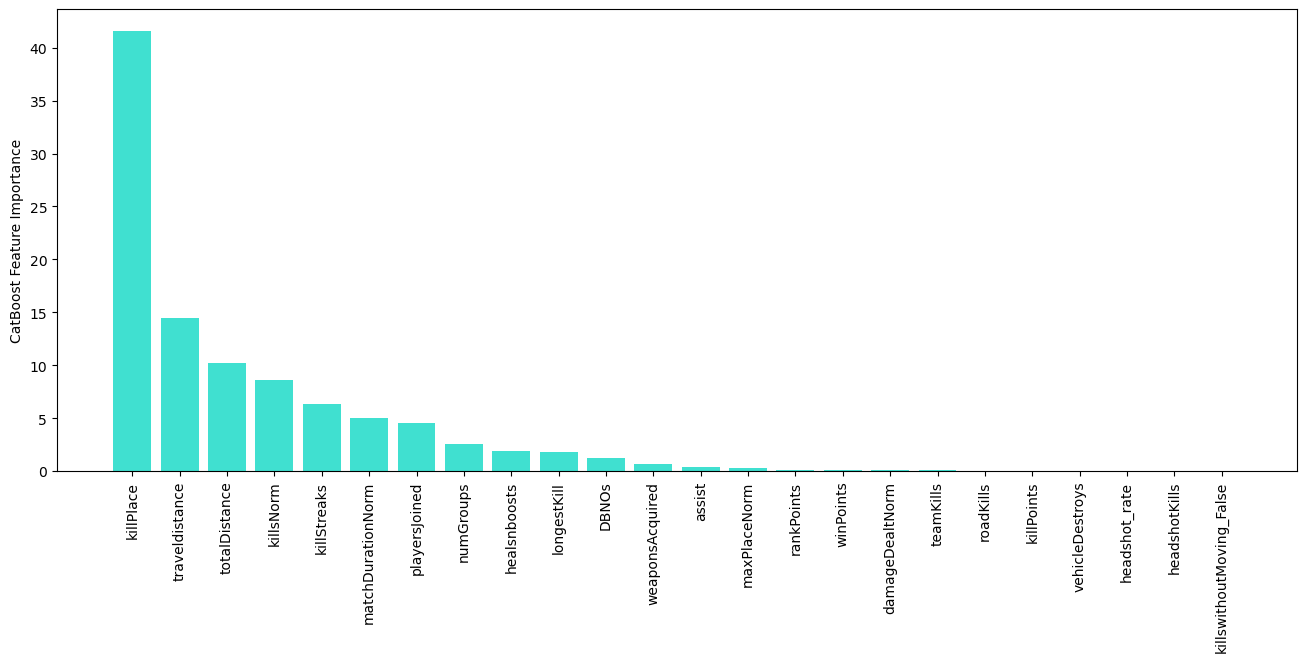

In [63]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

#### Prediction

In [64]:
pred = model.predict(xtest)

In [65]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.08
R2: 0.93


![Giphy image](https://media.giphy.com/media/KB89dMAtH79VIvxNCW/giphy.gif)